In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from itertools import combinations
from scipy.stats import ttest_ind

students = pd.read_csv('stud_math.csv') 

# посмотрим на данные и их свойства 
display(students.head(10))
display(students.info())
# переименуем столбцы на привычный манер
students.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu', 'm_job', 'f_job',
                    'reason', 'guardian', 'travel_time', 'study_time', 'failures', 'school_sup', 'fam_sup', 'paid',
                    'activities', 'nursery', 'granular', 'higher', 'internet', 'romantic', 'fam_rel', 'free_time',
                    'go_out', 'health', 'absences', 'score']
# отберем отдельно числовые и строковые столбцы
num = ['age', 'm_edu', 'f_edu', 'travel_time', 'study_time', 'failures', 'fam_rel', 'free_time',
       'go_out', 'health', 'absences', 'score']
obj = ['school', 'sex', 'address', 'fam_size', 'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'school_sup', 
       'fam_sup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

display(students.head(10))
# удалим столбец, он не несет какой либо информации полезной для нас
students.drop(['granular'], inplace = True, axis = 1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,granular,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


age [18 17 15 16 19 22 20 21] unique = 8


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

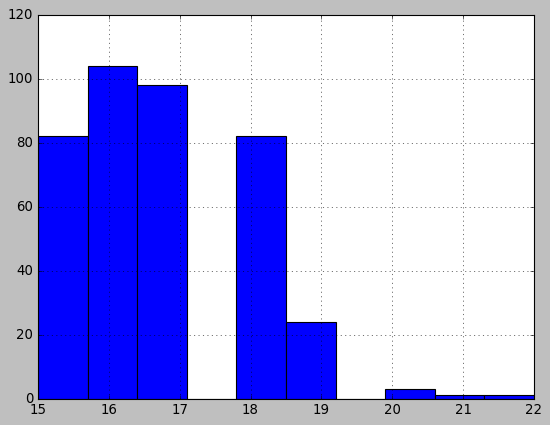

In [266]:
#посмотрим отдельно на каждый из числовых столбцов
column = 'age'
print(column, students[column].unique(), 'unique =', students[column].nunique())
display(pd.DataFrame(students[column].value_counts()))
students[column].hist()
students[column].describe()

# все ок, вбросов нет, пустых значений нет

m_edu [ 4.  1.  3.  2. nan  0.] unique = 5


,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,NaN,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,NaN,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

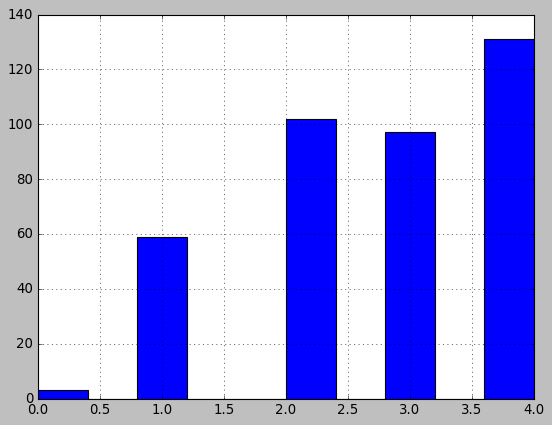

In [265]:
column = 'm_edu'
print(column, students[column].unique(), 'unique =', students[column].nunique())
display(pd.DataFrame(students[column].value_counts()))
display(pd.DataFrame(students).loc[(students[column]).isnull()])
students[column].hist()
students[column].describe()
# вбросов нет, но 3 пустых значений, оставляем

f_edu [ 4.  1.  2.  3. 40. nan  0.] unique = 6


,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: f_edu, dtype: float64

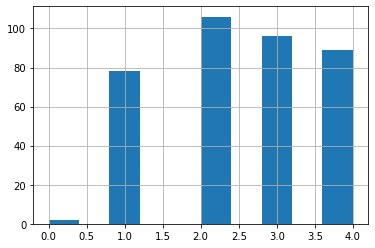

In [106]:
column = 'f_edu'
print(column, students[column].unique(), 'unique =', students[column].nunique())
display(pd.DataFrame(students[column].value_counts()))
display(pd.DataFrame(students).loc[(students[column]).isnull()])
# удаляем один вброс, считаем что это 4, а не 40
pd.DataFrame(students).loc[students['f_edu'] > 4, 'f_edu'] = 4
students[column].hist()
students[column].describe()
# вбросов больше нет, пустые есть но заполнить их не получится

travel_time [ 2.  1.  3. nan  4.] unique = 4


,travel_time
1.0,242
2.0,96
3.0,22
4.0,7


,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
30,GP,M,15,U,GT3,T,4.0,4.0,health,services,home,mother,NaN,2.0,0.0,no,yes,yes,no,no,yes,yes,no,5.0,4.0,2.0,NaN,0.0,60.0
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0
37,GP,M,16,R,GT3,A,4.0,4.0,other,teacher,reputation,mother,NaN,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,2.0,4.0,3.0,5.0,7.0,75.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0
70,GP,M,16,U,GT3,T,3.0,1.0,other,other,reputation,father,NaN,4.0,0.0,no,yes,yes,no,yes,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
132,GP,F,17,U,LE3,T,2.0,2.0,other,other,course,father,NaN,1.0,0.0,no,yes,no,no,yes,yes,NaN,yes,3.0,4.0,4.0,5.0,12.0,60.0


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: travel_time, dtype: float64

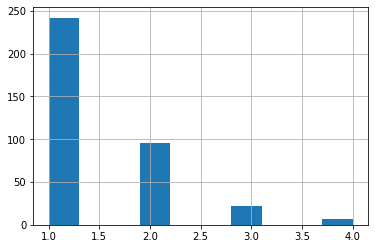

In [63]:
column = 'travel_time'
print(column, students[column].unique(), 'unique =', students[column].nunique())
display(pd.DataFrame(students[column].value_counts()))
display(pd.DataFrame(students).loc[(students[column]).isnull()])
students[column].hist()
students[column].describe()
# вбросов нет, пустые есть, но заполнить их не получится

fam_rel [ 4.  5.  3. nan  1.  2.] unique = 5


,fam_rel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
12,GP,M,15,U,LE3,T,4.0,4.0,health,services,course,father,1.0,1.0,0.0,no,yes,yes,yes,yes,yes,NaN,no,NaN,3.0,3.0,5.0,2.0,70.0
20,GP,M,15,U,GT3,T,4.0,3.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,75.0
43,GP,M,15,U,GT3,T,2.0,2.0,services,services,course,father,1.0,1.0,0.0,yes,yes,no,NaN,yes,yes,yes,no,NaN,4.0,1.0,1.0,0.0,55.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
102,GP,M,15,U,GT3,T,4.0,4.0,services,other,course,mother,1.0,1.0,0.0,no,yes,no,yes,no,yes,yes,no,NaN,3.0,3.0,5.0,4.0,70.0
118,GP,M,17,R,GT3,T,1.0,3.0,other,NaN,course,father,3.0,2.0,1.0,no,yes,no,yes,yes,yes,NaN,no,NaN,2.0,4.0,5.0,20.0,40.0


count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: fam_rel, dtype: float64

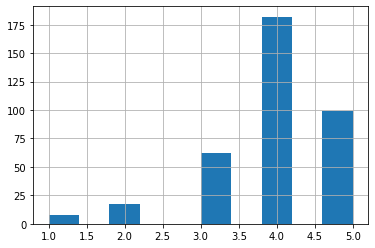

In [66]:
column = 'fam_rel'
print(column, students[column].unique(), 'unique =', students[column].nunique())
display(pd.DataFrame(students[column].value_counts()))
display(pd.DataFrame(students).loc[(students[column]).isnull()])
# явная ошибка или вброс, заменим на 1
pd.DataFrame(students).loc[students['fam_rel'] == -1.0, 'fam_rel'] = 1
students[column].hist()
students[column].describe()

count    351.000000
mean       7.441595
std       24.430458
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

absences [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
   9.  38.  40.  23.  11.  17. 212.] unique = 34


,absences
0.0,102
2.0,55
4.0,48
6.0,29
8.0,19
10.0,15
12.0,11
14.0,11
3.0,8
16.0,7


,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
24,GP,F,15,R,GT3,T,2.0,4.0,services,health,course,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,NaN,40.0
101,GP,M,16,U,GT3,T,4.0,4.0,services,teacher,other,father,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,4.0,3.0,4.0,NaN,85.0
120,GP,F,15,U,GT3,T,1.0,2.0,at_home,NaN,course,mother,1.0,2.0,0.0,no,no,no,no,no,yes,yes,no,3.0,2.0,3.0,1.0,NaN,75.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
150,GP,M,18,U,LE3,T,1.0,1.0,other,other,course,mother,1.0,1.0,3.0,no,no,no,no,yes,no,yes,yes,2.0,3.0,5.0,4.0,NaN,0.0
172,GP,M,17,U,NaN,T,4.0,4.0,teacher,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,4.0,4.0,5.0,NaN,50.0
215,GP,F,17,U,LE3,T,3.0,2.0,other,other,reputation,mother,2.0,2.0,0.0,no,no,NaN,no,yes,yes,NaN,no,4.0,4.0,4.0,1.0,NaN,75.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
265,GP,M,18,R,LE3,NaN,3.0,4.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,4.0,2.0,5.0,1.0,NaN,85.0


<AxesSubplot:xlabel='absences', ylabel='score'>

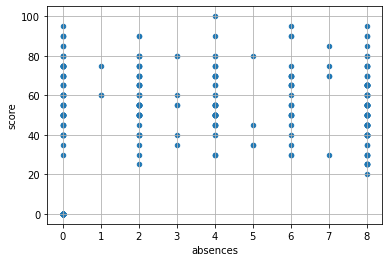

In [124]:
column = 'absences'
display(students[column].describe())
print(column, students[column].unique(), 'unique =', students[column].nunique())
display(pd.DataFrame(students[column].value_counts()))
#выделяются 385 и 212, но вбросами их считать нельзя
display(pd.DataFrame(students).loc[(students[column]).isnull()])
#пустые значениея есть, но заполнить их не представляется возможным
pd.DataFrame(students).loc[students['absences'] > 8, 'absences'] = 8
pd.DataFrame(students).plot(
    x = 'absences',
    y = 'score',
    kind = 'scatter', 
    grid = True,  
    legend = True)

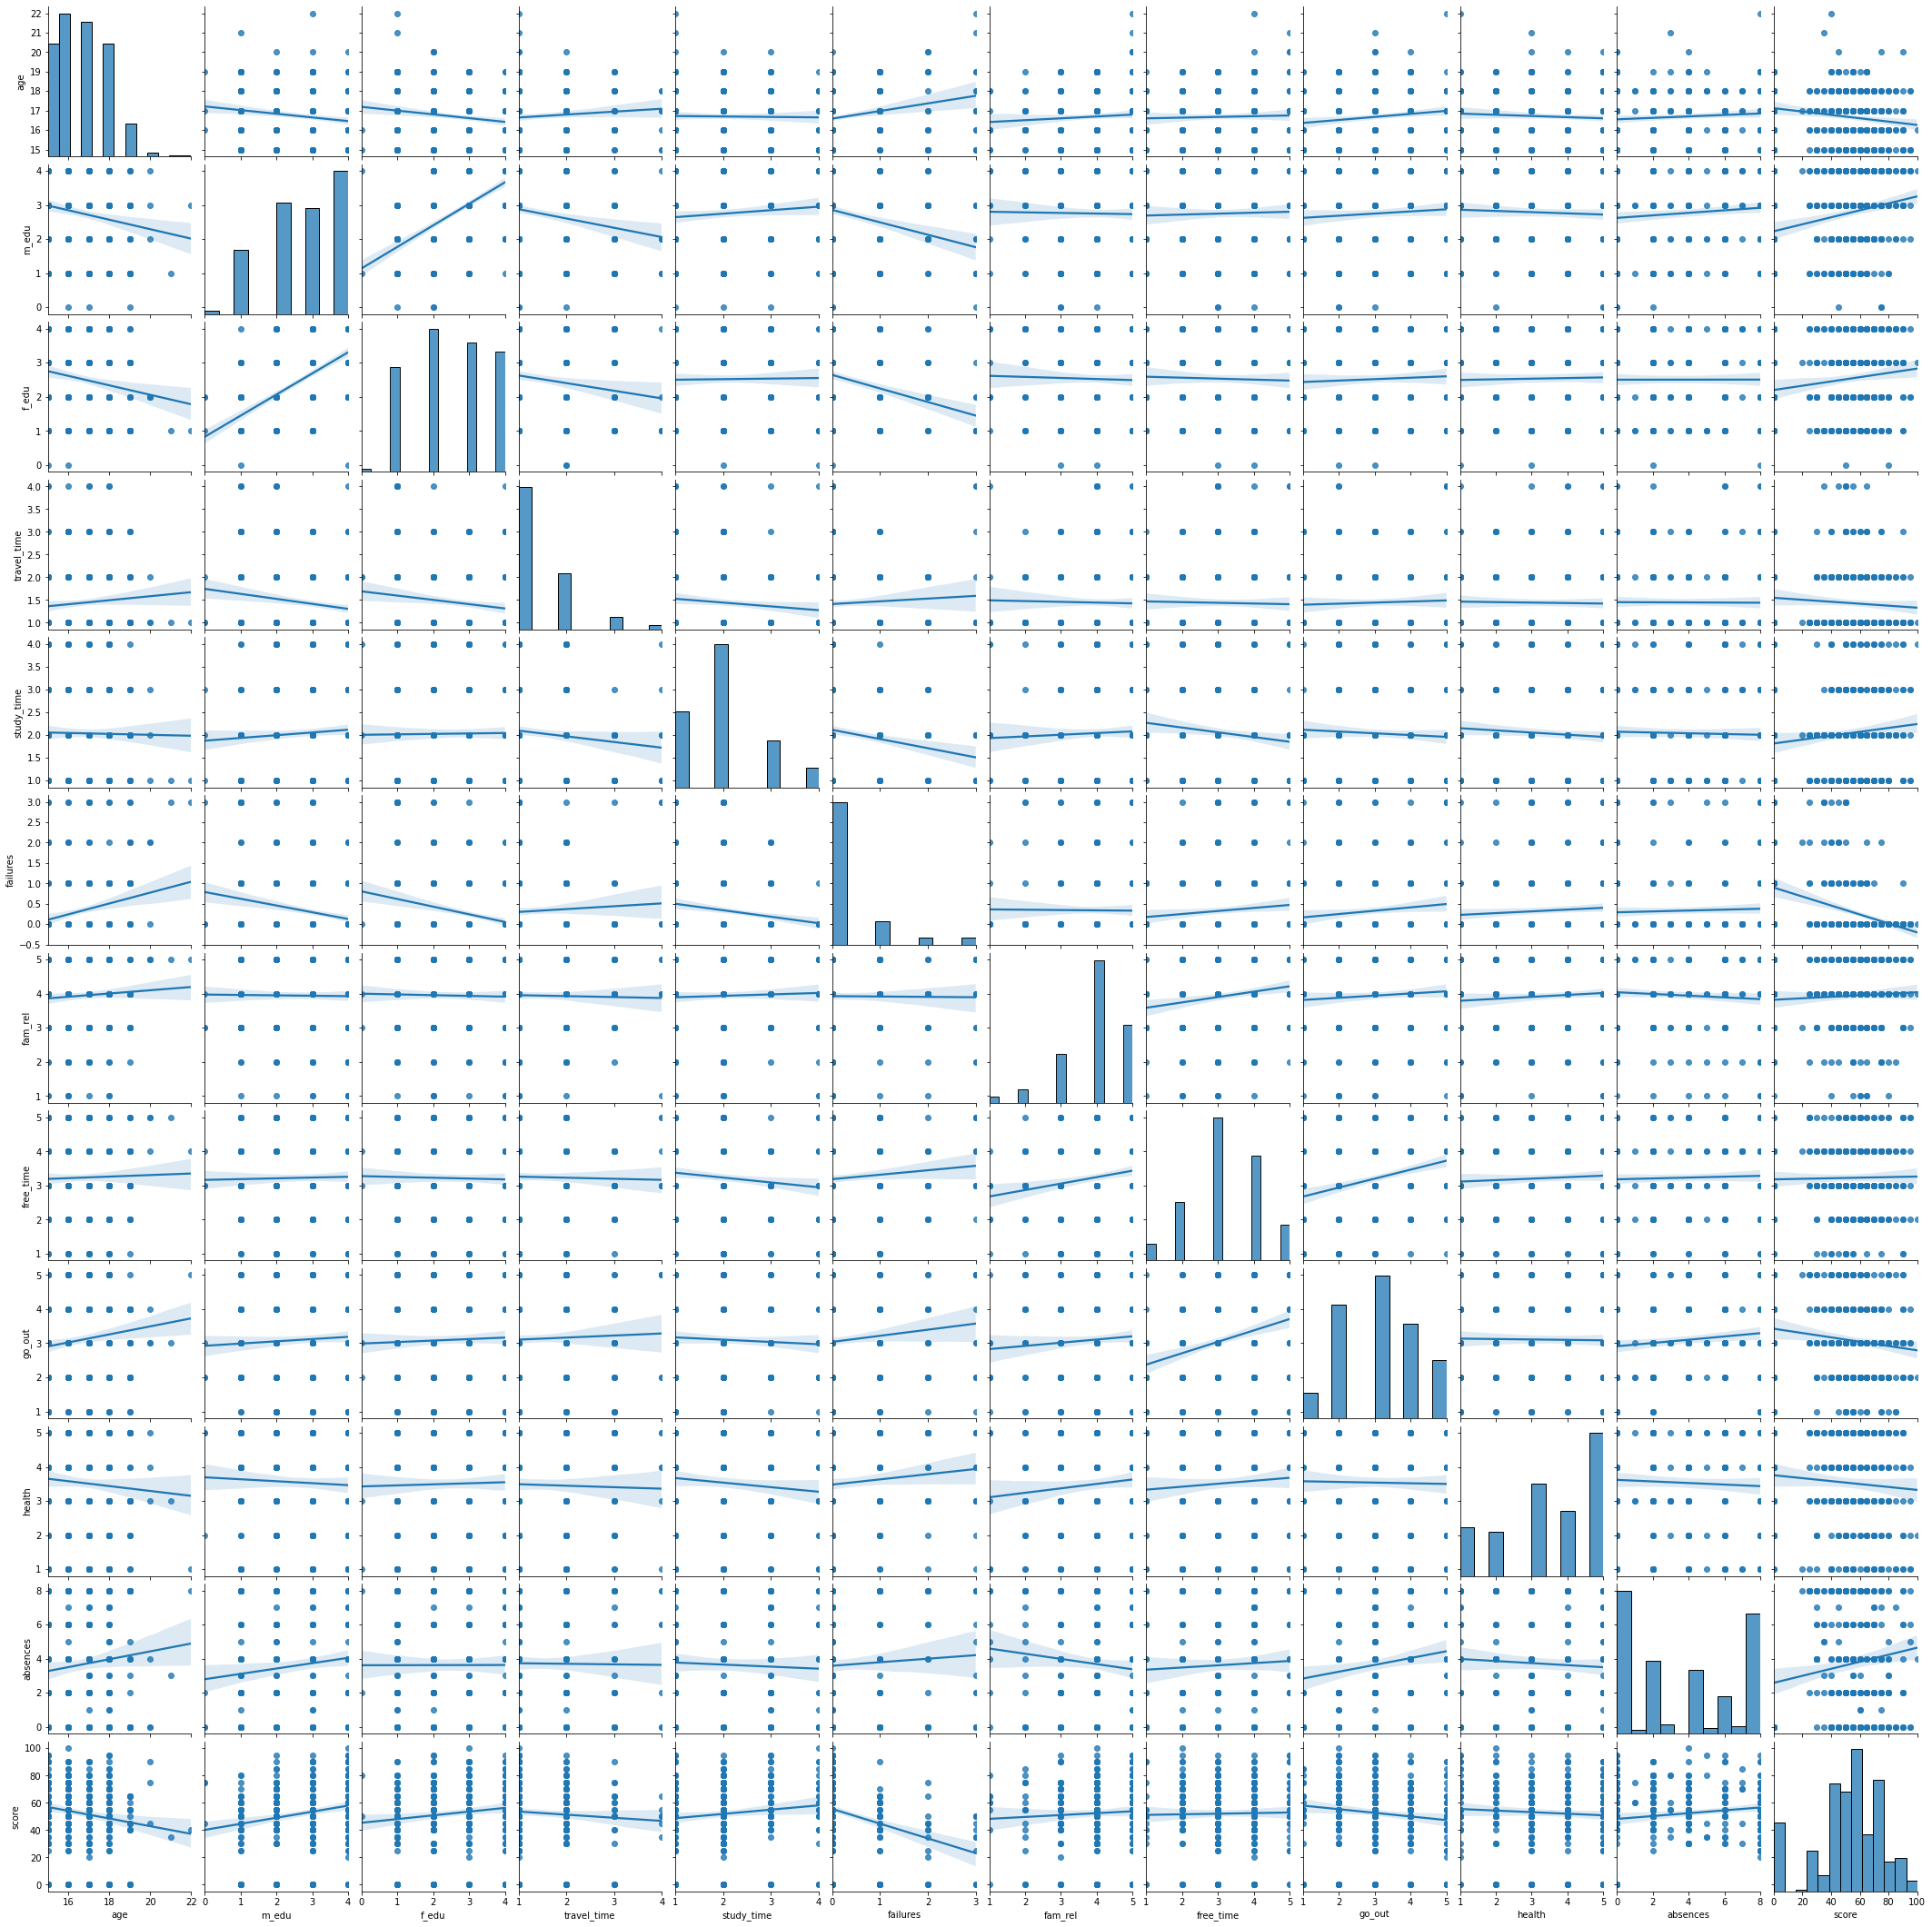

In [79]:
sns.pairplot(students, kind = 'reg')
#посмотрим корреляцию по всем столбцам в виде графиков и таблицы

In [80]:
students.corr()

,age,m_edu,f_edu,travel_time,study_time,failures,fam_rel,free_time,go_out,health,absences,score
age,1.000000,-0.161704,-0.163670,0.081508,-0.015556,0.228047,0.067415,0.029023,0.135107,-0.065946,0.092605,-0.155726
m_edu,-0.161704,1.000000,0.625516,-0.173515,0.078589,-0.245463,-0.014459,0.025335,0.064164,-0.045051,0.107897,0.213349
f_edu,-0.163670,0.625516,1.000000,-0.145349,0.012896,-0.272882,-0.026122,-0.025892,0.042663,0.023862,0.001259,0.130923
travel_time,0.081508,-0.173515,-0.145349,1.000000,-0.102206,0.064699,-0.021542,-0.021937,0.037636,-0.021531,-0.007173,-0.070559
study_time,-0.015556,0.078589,0.012896,-0.102206,1.000000,-0.178992,0.039555,-0.121969,-0.051280,-0.080016,-0.031790,0.115741
failures,0.228047,-0.245463,-0.272882,0.064699,-0.178992,1.000000,-0.009110,0.098382,0.120914,0.081284,0.047436,-0.344338
fam_rel,0.067415,-0.014459,-0.026122,-0.021542,0.039555,-0.009110,1.000000,0.172751,0.077167,0.086309,-0.087668,0.055305
free_time,0.029023,0.025335,-0.025892,-0.021937,-0.121969,0.098382,0.172751,1.000000,0.296437,0.061575,0.040301,0.019026
go_out,0.135107,0.064164,0.042663,0.037636,-0.051280,0.120914,0.077167,0.296437,1.000000,-0.015608,0.138532,-0.129685
health,-0.065946,-0.045051,0.023862,-0.021531,-0.080016,0.081284,0.086309,0.061575,-0.015608,1.000000,-0.052660,-0.070460


<AxesSubplot:xlabel='age', ylabel='score'>

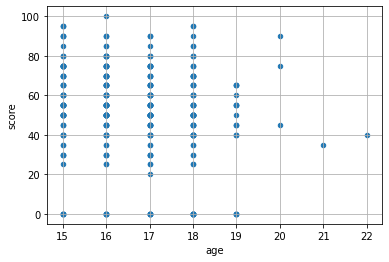

In [81]:
# отберем наиболее интересные для нас, остальные удалим
students.drop(['travel_time'], inplace = True, axis = 1) # время в пути до школы не влияет на баллы
students.drop(['fam_rel'], inplace = True, axis = 1) # аналогично семейные отношения
students.drop(['free_time'], inplace = True, axis = 1) # аналогично свободное время после школы
students.drop(['health'], inplace = True, axis = 1) # аналогично текущее состояние здоровья

# остаются:
# возраст 
pd.DataFrame(students).plot(
    x = 'age',
    y = 'score',
    kind = 'scatter', 
    grid = True,  
    legend = True)
# обратная зависимость, младшие получают лучший балл, можно предположить, что старшие ученики либо оставались 
# на второй год, либо изначально пошли позже учиться из-за отстающего развития

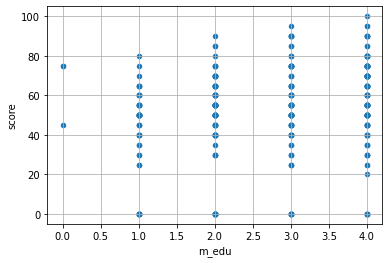

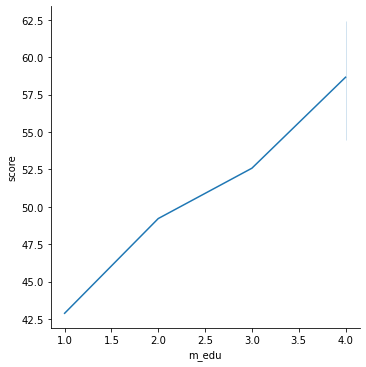

In [111]:
# образование мамы - прямая зависимость
pd.DataFrame(students).plot(
    x = 'm_edu',
    y = 'score',
    kind = 'scatter', 
    grid = True,  
    legend = True)
# если убрать нули и убрать строки с пустыми значениями, то имеется четкая корреляция оценки с образованием мамы
students.drop(students[students['m_edu'].isnull()].index, inplace = True)
students.drop(students[students['m_edu'] == 0].index, inplace = True)
sns.relplot(x="m_edu", y="score", kind="line", data=students);

<AxesSubplot:xlabel='f_edu', ylabel='score'>

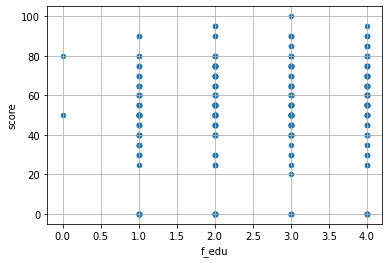

In [87]:
# образование папы - прямая зависимость
pd.DataFrame(students).plot(
    x = 'f_edu',
    y = 'score',
    kind = 'scatter', 
    grid = True,  
    legend = True)

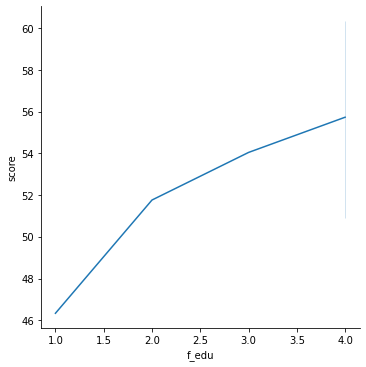

In [109]:
# если убрать два случая с нулями и убрать строки с пустыми значениями, то имеется четкая корреляция с образованием отца
students.drop(students[students['f_edu'].isnull()].index, inplace = True)
students.drop(students[students['f_edu'] == 0].index, inplace = True)
sns.relplot(x="f_edu", y="score", kind="line", data=students);

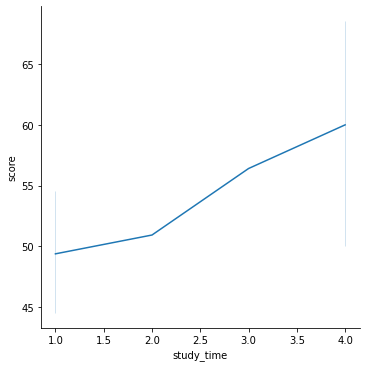

In [113]:
# время на учёбу помимо школы в неделю - прямая зависимость с баллами, те кто больше учатся, у тех выше баллы
sns.relplot(x="study_time", y="score", kind="line", data=students);

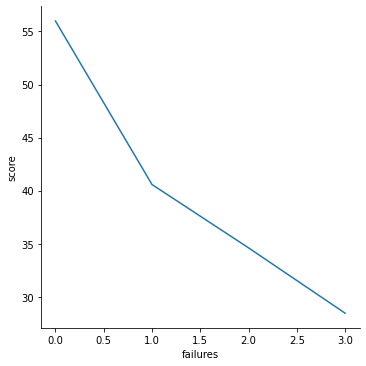

In [116]:
# количество внеучебных неудач имеет обратную зависимость от баллов, по всей видимости неудачи сопутсвуют и в школе
sns.relplot(x="failures", y="score", kind="line", data=students);

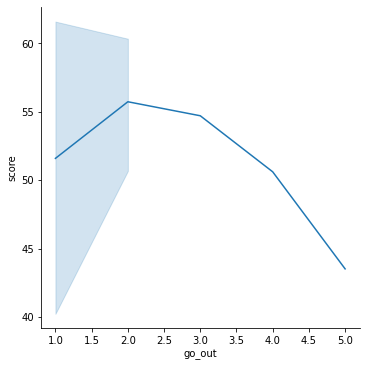

In [119]:
sns.relplot(x="go_out", y="score", kind="line", data=students);
# проведенное времени с друзьями видимо имеет разумный предел в 2 часа, а более негативно влияет на баллы

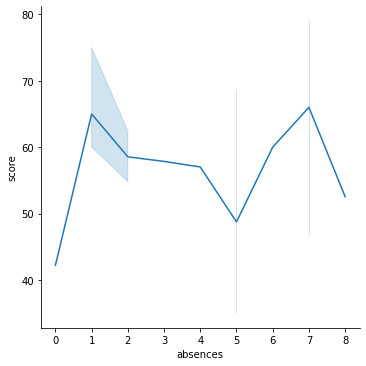

In [126]:
sns.relplot(x="absences", y="score", kind="line", data=students);
# 75% пропущенных занятий находятся в пределах 8 часов, внутри этой выборки корреляции не видно, 
# можем и этот стодбец удалить
students.drop(['absences'], inplace = True, axis = 1)

# рассмотрим теперь номинативные переменные

In [243]:
plt.style.use('classic')
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (9, 4))
    sns.boxplot(x=column, y='score', data=students, ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()
def get_density(column):
    fig, ax = plt.subplots(figsize = (9, 4))
    types = students[column].value_counts()
    types = list(types.index)
    for b_type in types:
        subset = students[students[column] == b_type]
        sns.kdeplot(subset['score'], legend = True, label = b_type, shade = False, alpha = 0.8)
    plt.xlabel('итоговые баллы', size = 10)
    plt.ylabel(column, size = 10)

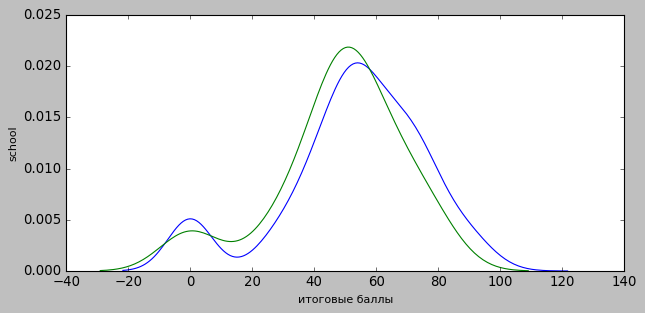

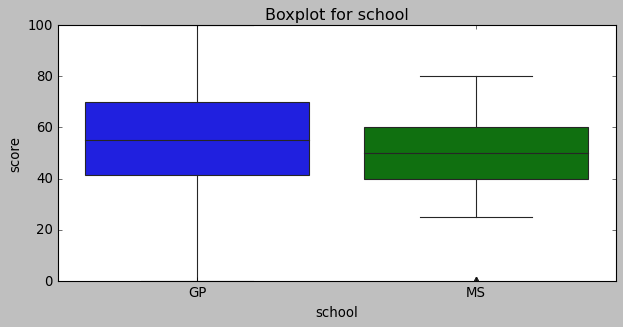

In [244]:
column = 'school'
get_density(column)
get_boxplot(column)

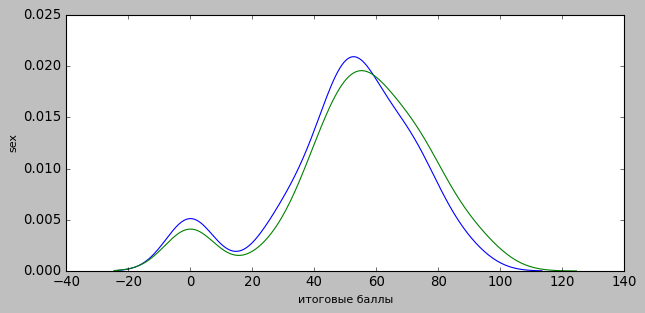

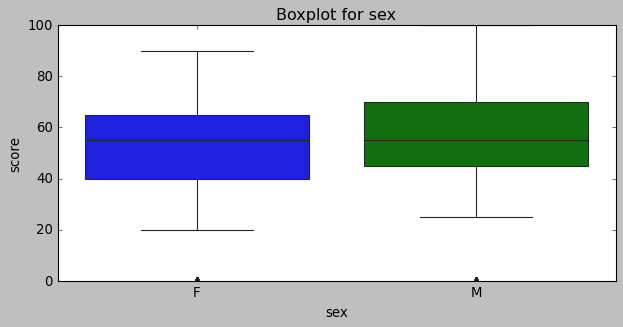

In [257]:
column = 'sex'
get_density(column)
get_boxplot(column)

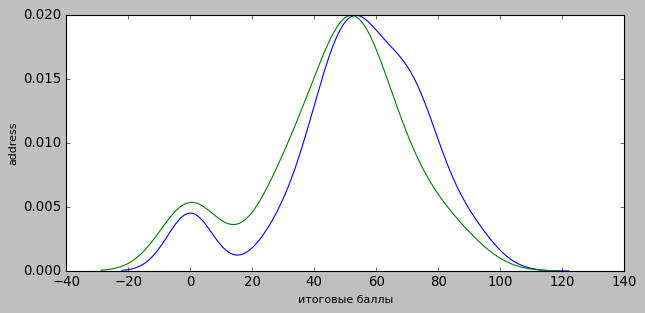

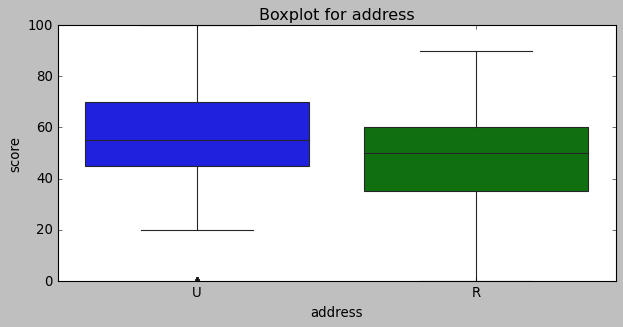

In [258]:
column = 'address'
get_density(column)
get_boxplot(column)

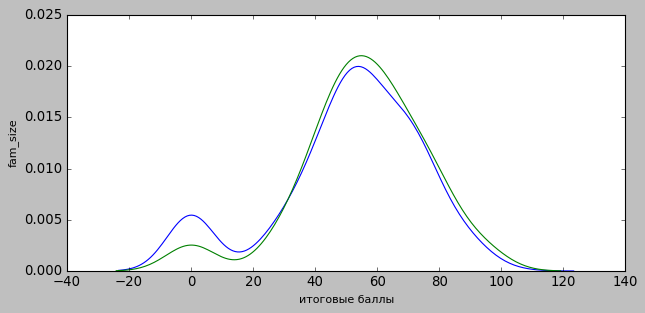

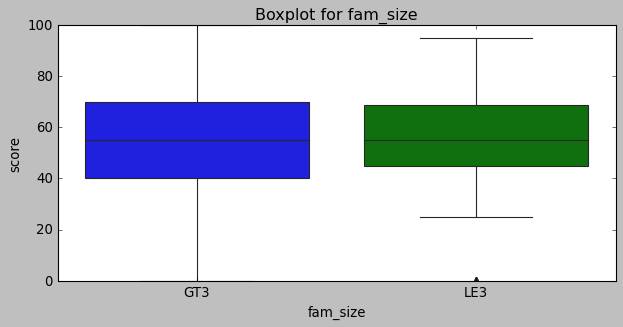

In [259]:
column = 'fam_size'
get_density(column)
get_boxplot(column)

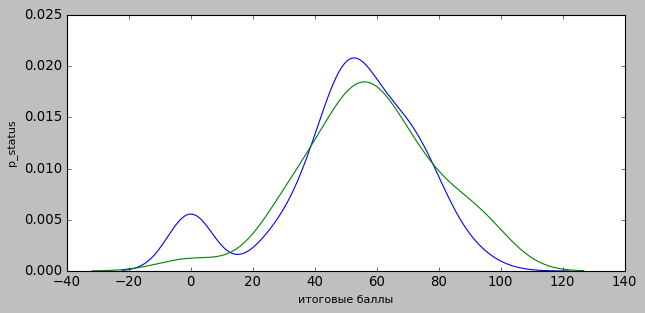

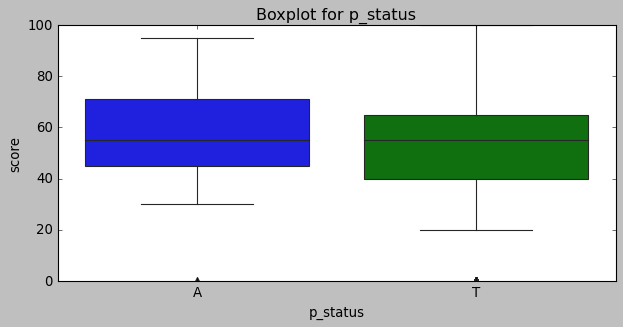

In [260]:
column = 'p_status'
get_density(column)
get_boxplot(column)

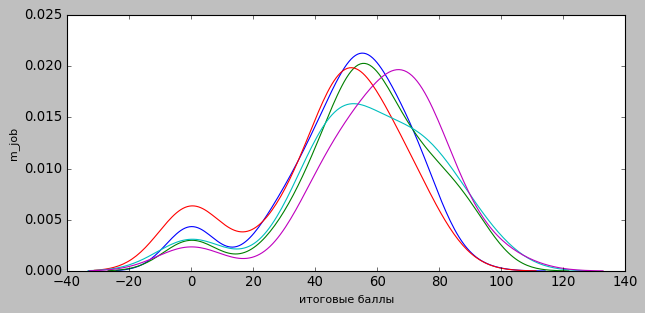

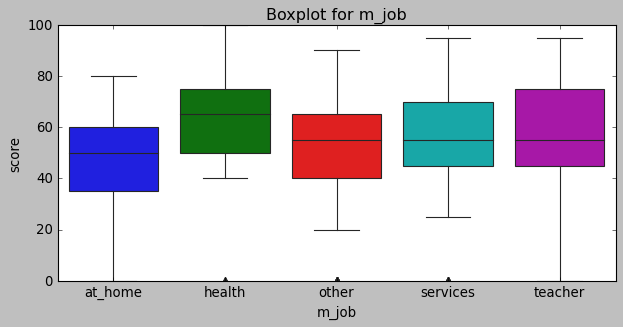

In [261]:
column = 'm_job'
get_density(column)
get_boxplot(column)

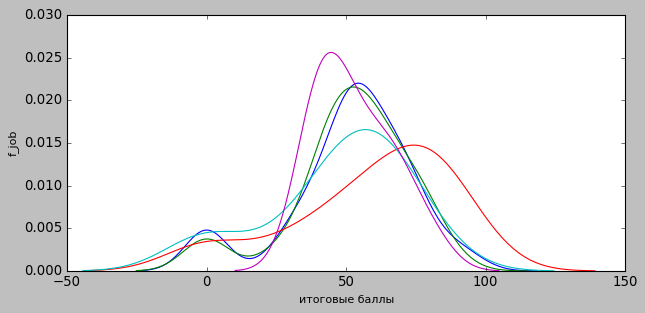

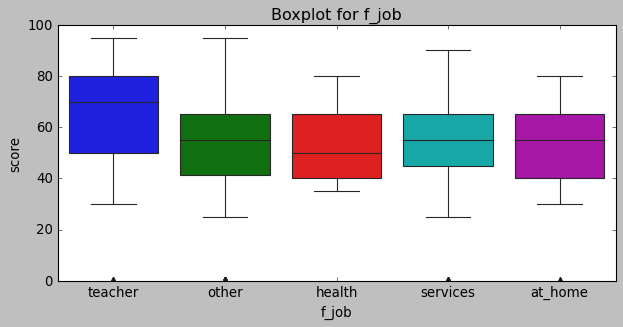

In [245]:
column = 'f_job'
get_density(column)
get_boxplot(column)

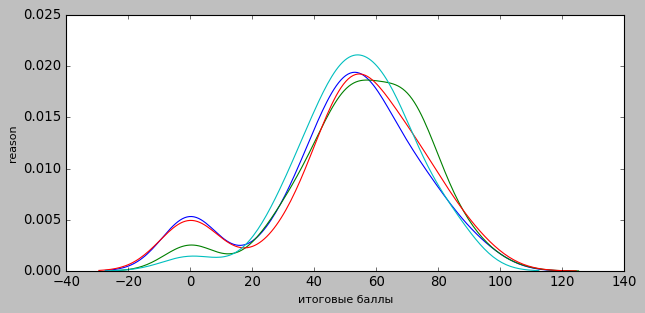

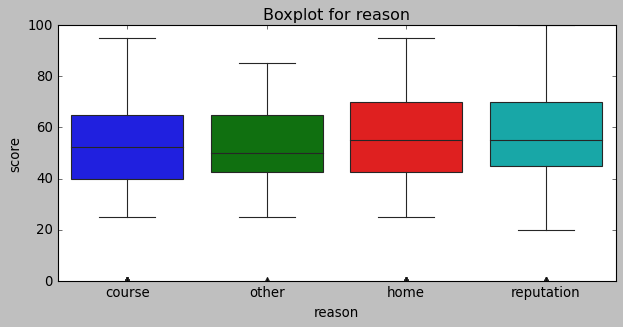

In [246]:
column = 'reason'
get_density(column)
get_boxplot(column)

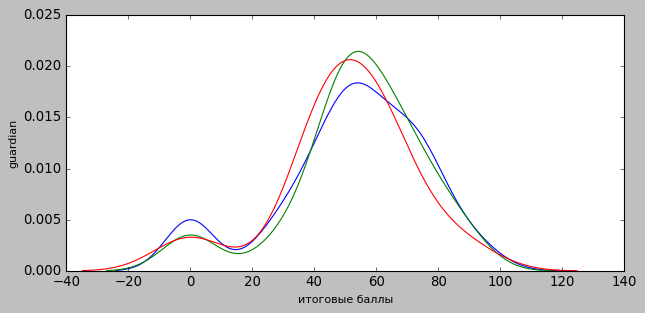

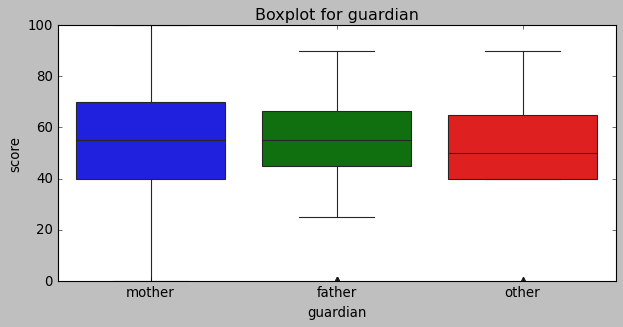

In [247]:
column = 'guardian'
get_density(column)
get_boxplot(column)

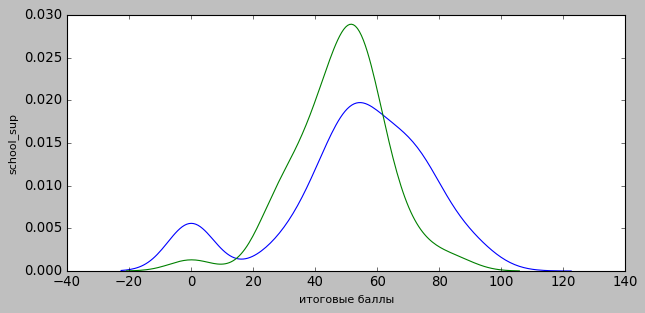

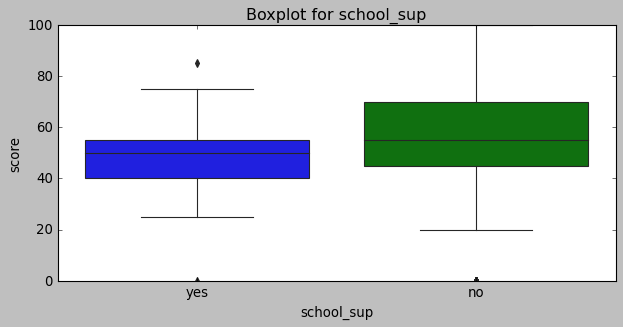

In [248]:
column = 'school_sup'
get_density(column)
get_boxplot(column)

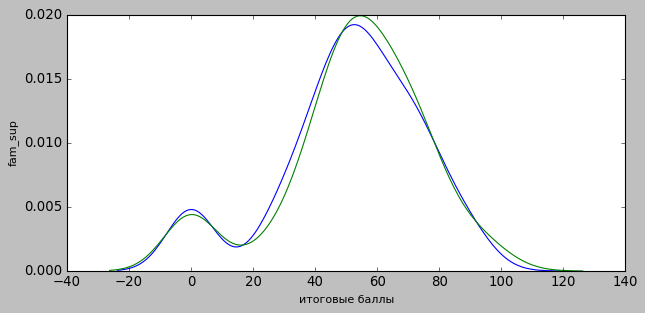

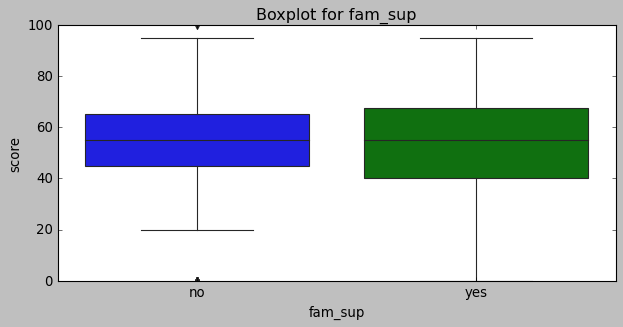

In [249]:
column = 'fam_sup'
get_density(column)
get_boxplot(column)

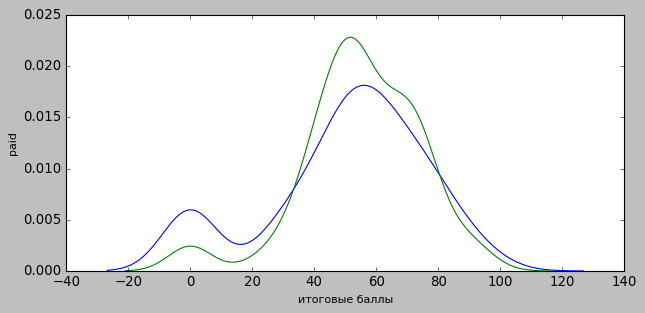

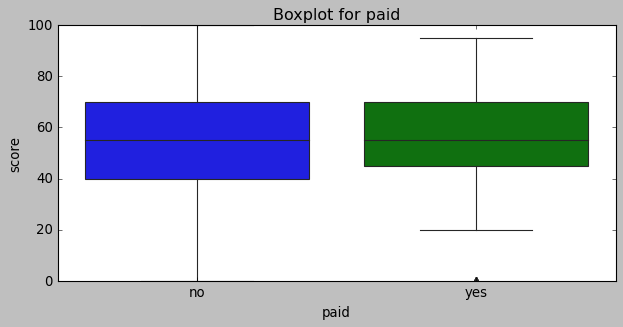

In [250]:
column = 'paid'
get_density(column)
get_boxplot(column)

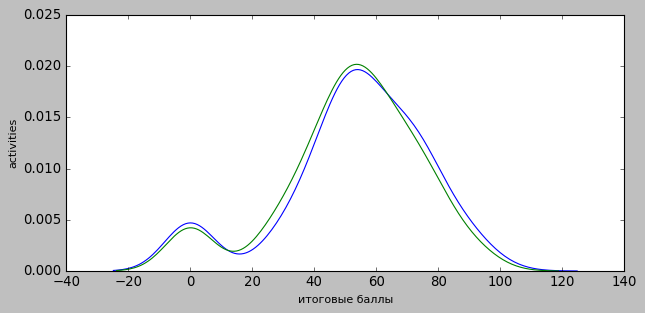

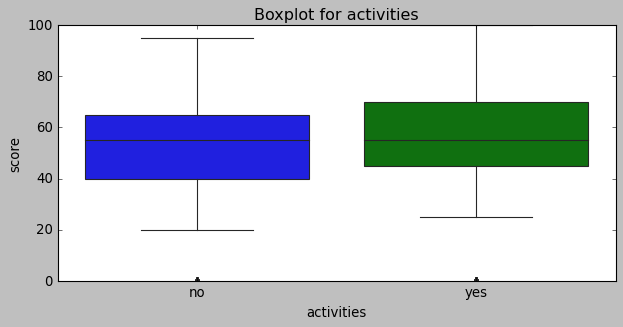

In [251]:
column = 'activities'
get_density(column)
get_boxplot(column)

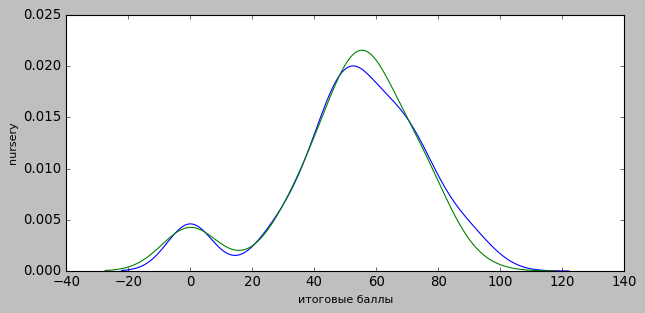

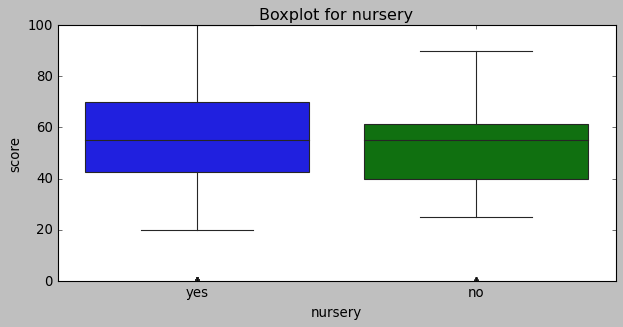

In [252]:
column = 'nursery'
get_density(column)
get_boxplot(column)

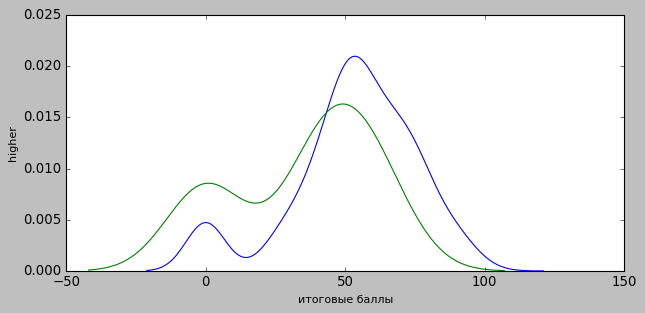

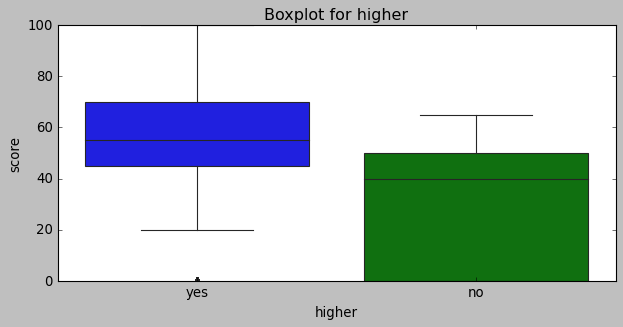

In [253]:
column = 'higher'
get_density(column)
get_boxplot(column)

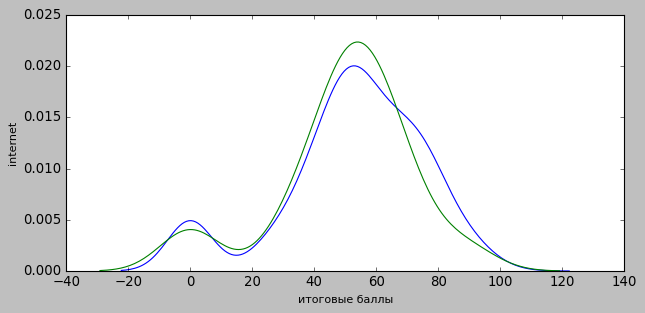

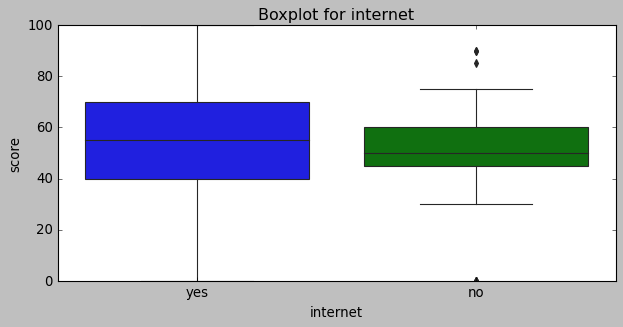

In [254]:
column = 'internet'
get_density(column)
get_boxplot(column)

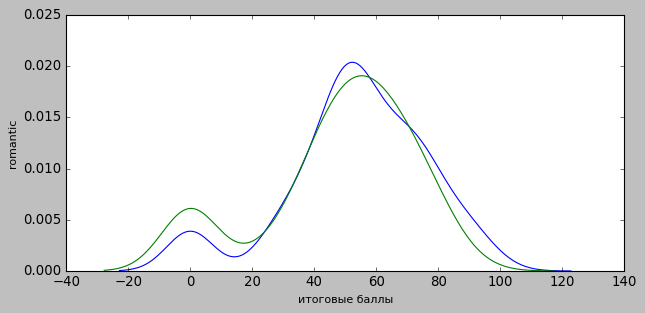

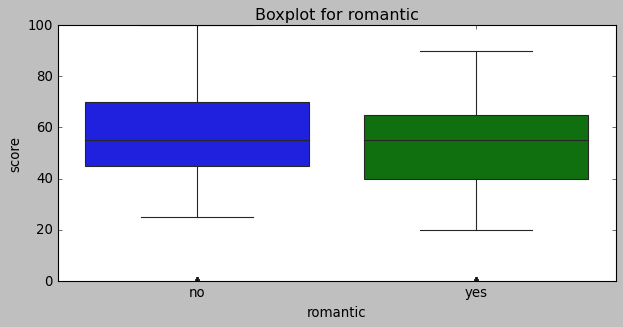

In [255]:
column = 'romantic'
get_density(column)
get_boxplot(column)

In [256]:
# проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): 
            print('Найдены статистически значимые различия для колонки', column)
            break
for col in obj:
    get_stat_dif(col)
# несмотря на то, что найдена только колонка m_job, на графиках еще выделяются f_job, school_sup и higher, 
# например у тех учеников, кто стремится к высшему образованию, медиана баллов находится выше 40,
# а ось минимума начинается от 20, аналогично можно сказать и о показателе дополнительная образовательная 
# поддержка в школе

Найдены статистически значимые различия для колонки m_job


In [262]:
# в итоге удалем ненужные столбцы
students.drop(['school'], inplace = True, axis = 1)
students.drop(['sex'], inplace = True, axis = 1)
students.drop(['address'], inplace = True, axis = 1)
students.drop(['fam_size'], inplace = True, axis = 1)
students.drop(['p_status'], inplace = True, axis = 1)
students.drop(['reason'], inplace = True, axis = 1)
students.drop(['guardian'], inplace = True, axis = 1)
students.drop(['fam_sup'], inplace = True, axis = 1)
students.drop(['paid'], inplace = True, axis = 1)
students.drop(['activities'], inplace = True, axis = 1)
students.drop(['nursery'], inplace = True, axis = 1)
students.drop(['internet'], inplace = True, axis = 1)
students.drop(['romantic'], inplace = True, axis = 1)
students.head()
students.info()
print('End')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 394
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          363 non-null    int64  
 1   m_edu        363 non-null    float64
 2   f_edu        363 non-null    float64
 3   m_job        344 non-null    object 
 4   f_job        329 non-null    object 
 5   travel_time  338 non-null    float64
 6   study_time   356 non-null    float64
 7   failures     345 non-null    float64
 8   school_sup   354 non-null    object 
 9   higher       347 non-null    object 
 10  fam_rel      339 non-null    float64
 11  free_time    354 non-null    float64
 12  go_out       356 non-null    float64
 13  health       350 non-null    float64
 14  score        357 non-null    float64
dtypes: float64(10), int64(1), object(4)
memory usage: 55.4+ KB
End
